# HR Analytics Project- Understanding the Attrition in HR
Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

C:\Users\del\Desktop\ibm-hr-analytics-employee-attrition-performance.zip

Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
HR = pd.read_csv('C:\\Users\\del\\Desktop\\Python\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
HR.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
# Check the dimensions of the dataset (number of rows and columns)
print(HR.shape)

(1470, 35)


In [4]:
# Get basic statistical information about the dataset
print(HR.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [5]:
# Check the data types and missing values in the dataset
print(HR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Check for and handle any missing values in the dataset
print(HR.isnull().sum())

# Handle categorical variables using one-hot encoding or label encoding, as required
# For example:
# df = pd.get_dummies(df, columns=['EducationField', 'Department'], drop_first=True)

# Drop any irrelevant columns that may not contribute to the analysis
# For example:
# df.drop(['EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

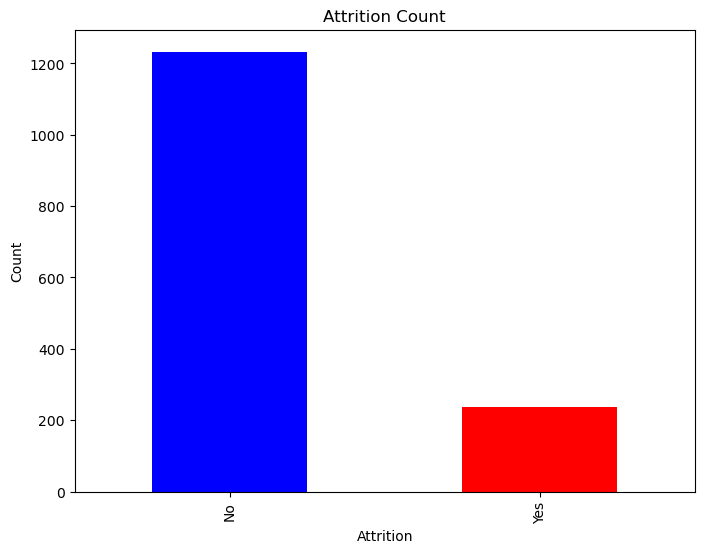

In [7]:
# Plot attrition count
plt.figure(figsize=(8, 6))
HR['Attrition'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count')
plt.show()

In [8]:
NULLS = HR[HR.isnull().any(axis=1)]

In [9]:
HR.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<Axes: >

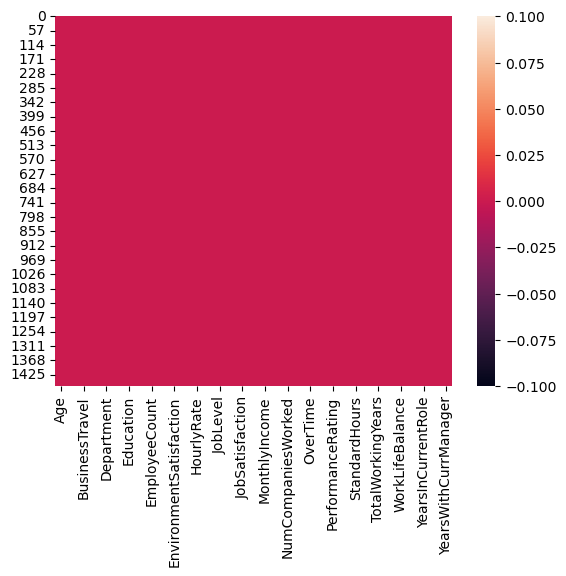

In [10]:
sns.heatmap(HR.isnull())

In [11]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
HR.duplicated().sum()

0

In [14]:
HR.sort_values(by="MonthlyIncome", ascending=True).head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
513,20,Yes,Travel_Rarely,1362,Research & Development,10,1,Medical,1,701,...,4,80,0,1,5,3,1,0,1,1
727,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,...,4,80,0,0,2,3,0,0,0,0
764,28,No,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,...,2,80,0,1,5,3,1,0,0,0
1338,30,Yes,Travel_Rarely,945,Sales,9,3,Medical,1,1876,...,3,80,0,1,3,2,1,0,0,0
1365,29,Yes,Travel_Frequently,746,Sales,24,3,Technical Degree,1,1928,...,4,80,0,1,3,3,1,0,0,0
177,19,Yes,Travel_Rarely,303,Research & Development,2,3,Life Sciences,1,243,...,3,80,0,1,3,2,1,0,1,0
911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,...,4,80,0,1,4,3,1,0,1,0
1402,31,No,Travel_Rarely,1276,Research & Development,2,1,Medical,1,1974,...,3,80,3,1,4,3,1,0,0,0
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,1,80,0,0,2,3,0,0,0,0
910,23,No,Travel_Rarely,373,Research & Development,1,2,Life Sciences,1,1270,...,4,80,1,1,2,3,1,0,0,1


In [15]:
HR.sort_values(by="MonthlyIncome", ascending=False).head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
190,52,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,...,1,80,1,34,5,3,33,18,11,9
746,41,No,Non-Travel,247,Research & Development,7,1,Life Sciences,1,1035,...,2,80,2,21,3,3,21,16,5,10
851,56,No,Travel_Rarely,718,Research & Development,4,4,Technical Degree,1,1191,...,4,80,1,28,2,3,5,2,4,2
165,50,No,Travel_Rarely,1452,Research & Development,11,3,Life Sciences,1,226,...,2,80,0,21,5,3,5,4,4,4
568,55,Yes,Travel_Rarely,725,Research & Development,2,3,Medical,1,787,...,4,80,1,24,2,3,5,2,1,4
918,51,No,Travel_Frequently,237,Sales,9,3,Life Sciences,1,1282,...,1,80,1,31,5,2,29,10,11,10
749,52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1,1038,...,4,80,1,33,3,3,32,14,6,9
1242,40,No,Travel_Rarely,611,Sales,7,4,Medical,1,1740,...,2,80,0,21,3,2,21,8,12,8
898,43,No,Travel_Rarely,920,Research & Development,3,3,Life Sciences,1,1255,...,2,80,1,25,2,3,8,7,0,7
956,56,No,Travel_Rarely,206,Human Resources,8,4,Life Sciences,1,1338,...,1,80,0,36,4,3,7,3,7,7


# Create a heatmap for the correlation matrix

<Axes: >

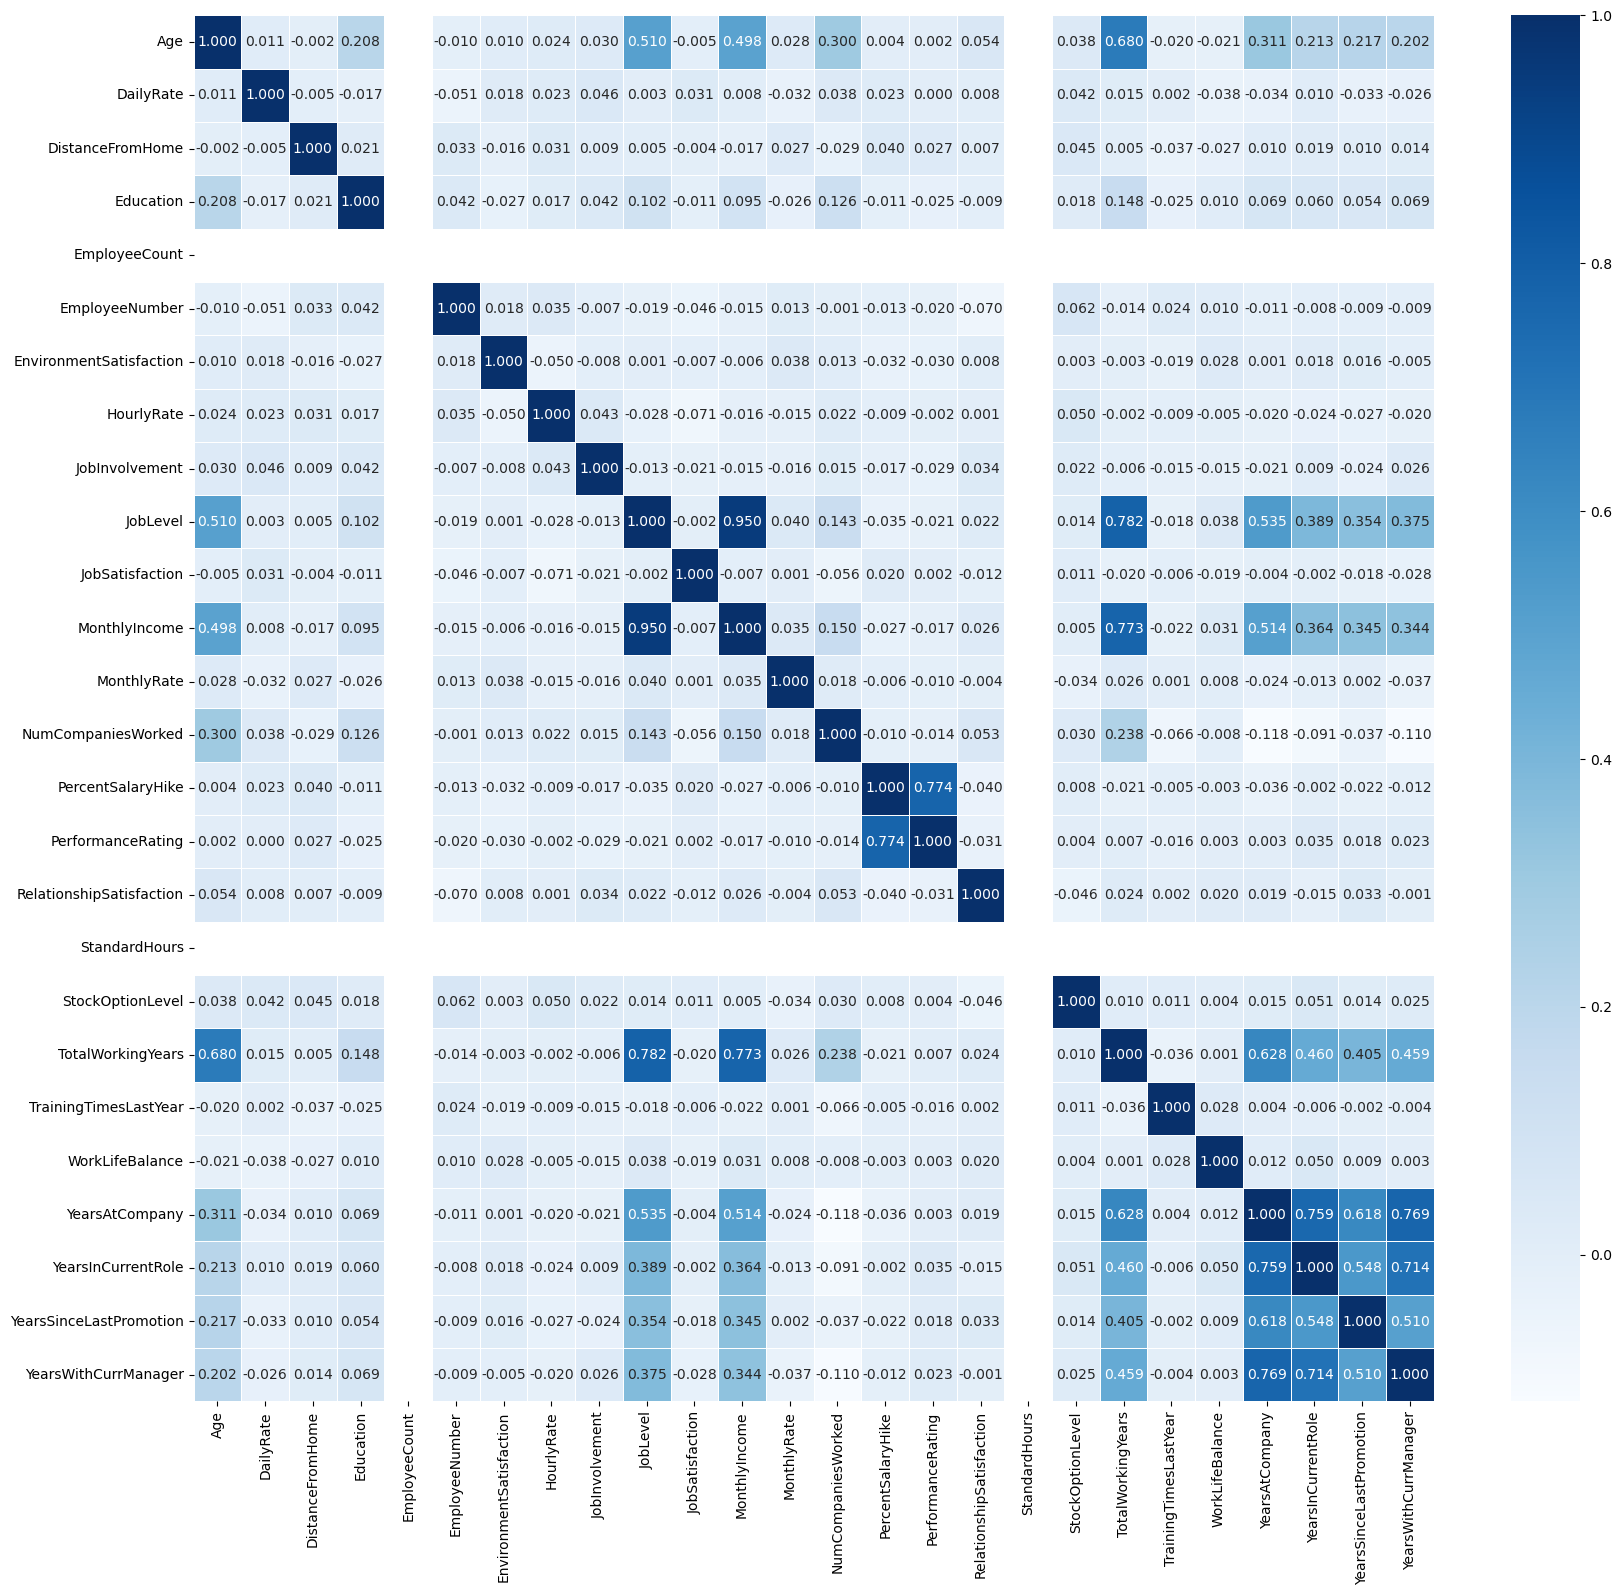

In [16]:
 plt.figure(figsize=(20,18))
sns.heatmap(HR.corr(),cmap='Blues',linewidth=0.5, annot=True,fmt='.3f')

# EDA ---- Performing 

Ploting Outliners 

In [17]:
HR.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# Univeriate Analysis

Age                            Axes(0.125,0.814746;0.065678x0.0652542)
DailyRate                   Axes(0.203814,0.814746;0.065678x0.0652542)
DistanceFromHome            Axes(0.282627,0.814746;0.065678x0.0652542)
Education                   Axes(0.361441,0.814746;0.065678x0.0652542)
EmployeeCount               Axes(0.440254,0.814746;0.065678x0.0652542)
EmployeeNumber              Axes(0.519068,0.814746;0.065678x0.0652542)
EnvironmentSatisfaction     Axes(0.597881,0.814746;0.065678x0.0652542)
HourlyRate                  Axes(0.676695,0.814746;0.065678x0.0652542)
JobInvolvement              Axes(0.755508,0.814746;0.065678x0.0652542)
JobLevel                    Axes(0.834322,0.814746;0.065678x0.0652542)
JobSatisfaction                Axes(0.125,0.736441;0.065678x0.0652542)
MonthlyIncome               Axes(0.203814,0.736441;0.065678x0.0652542)
MonthlyRate                 Axes(0.282627,0.736441;0.065678x0.0652542)
NumCompaniesWorked          Axes(0.361441,0.736441;0.065678x0.0652542)
Percen

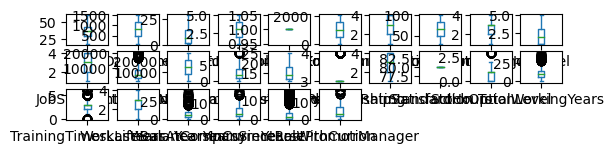

In [18]:
HR.plot(kind='box',subplots=True,layout=(10,10))

# Check distribution of skewness

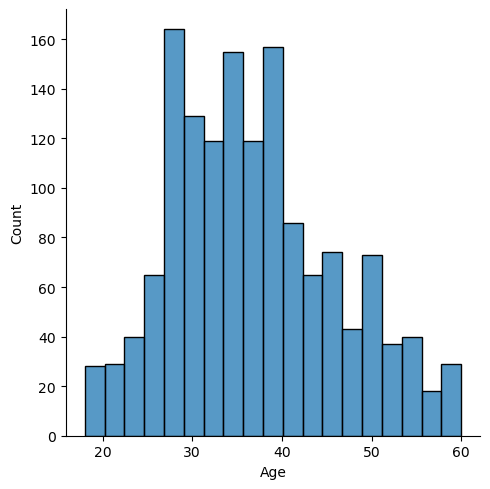

In [19]:
sns.displot(HR['Age'])

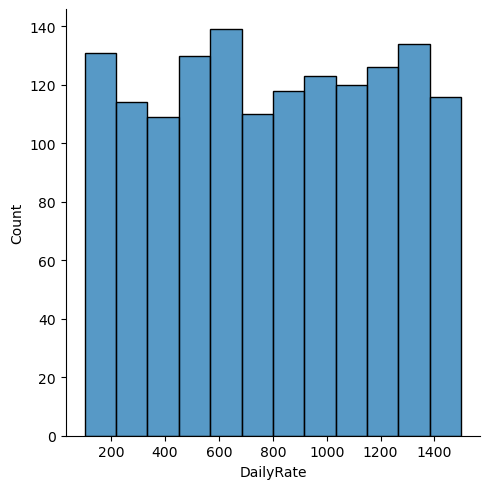

In [20]:
sns.displot(HR['DailyRate'])

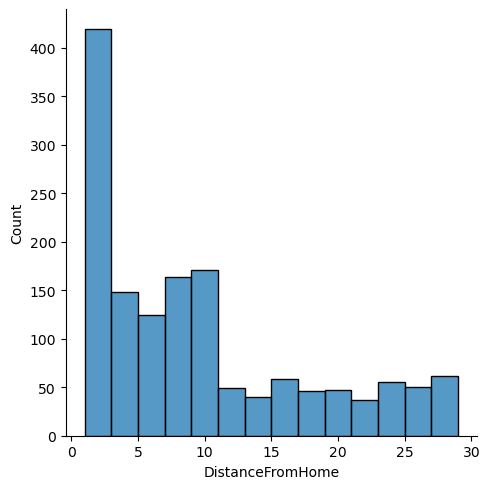

In [21]:
sns.displot(HR['DistanceFromHome'])

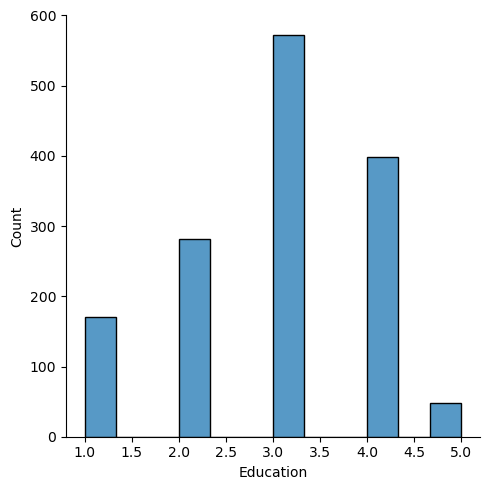

In [22]:
sns.displot(HR['Education'])

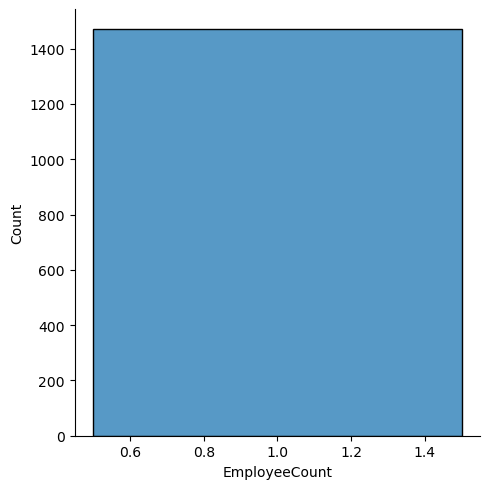

In [23]:
sns.displot(HR['EmployeeCount'])

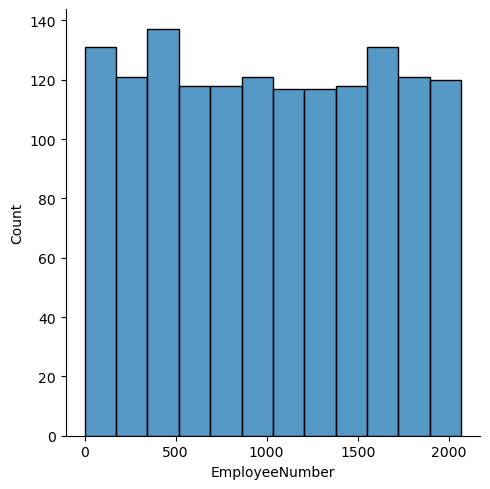

In [24]:
sns.displot(HR['EmployeeNumber'])

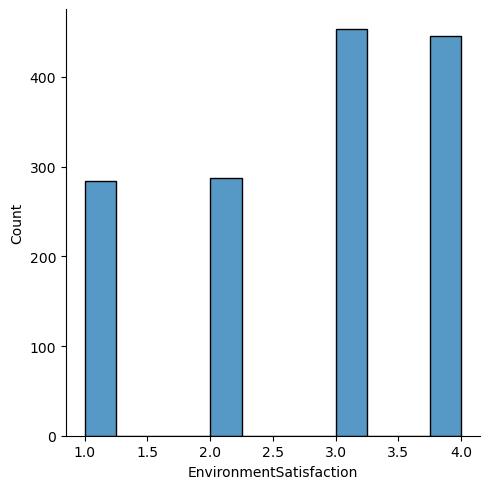

In [25]:
sns.displot(HR['EnvironmentSatisfaction'])

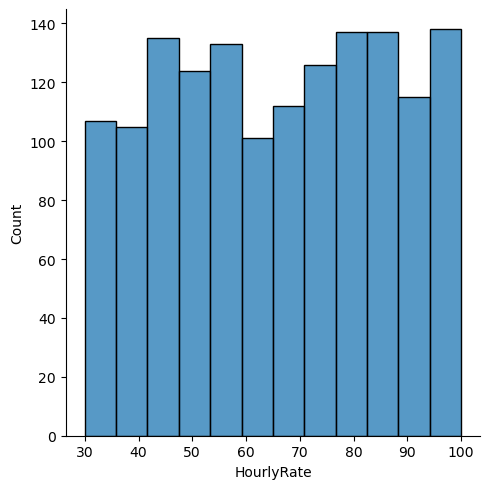

In [26]:
sns.displot(HR['HourlyRate'])

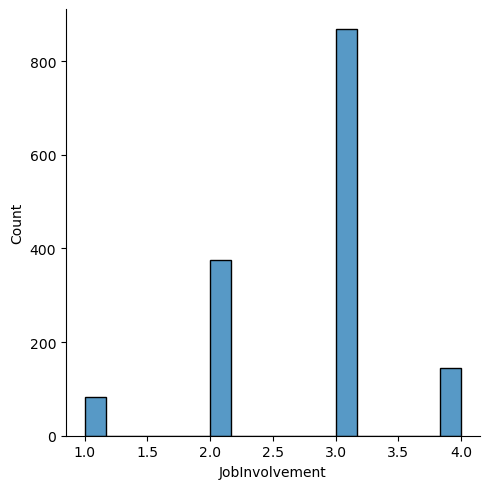

In [27]:
sns.displot(HR['JobInvolvement'])

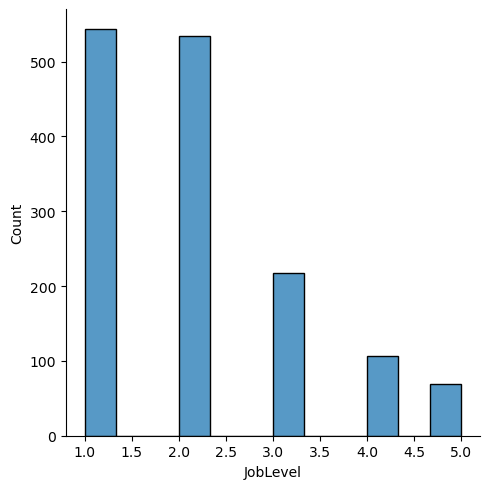

In [28]:
sns.displot(HR['JobLevel'])

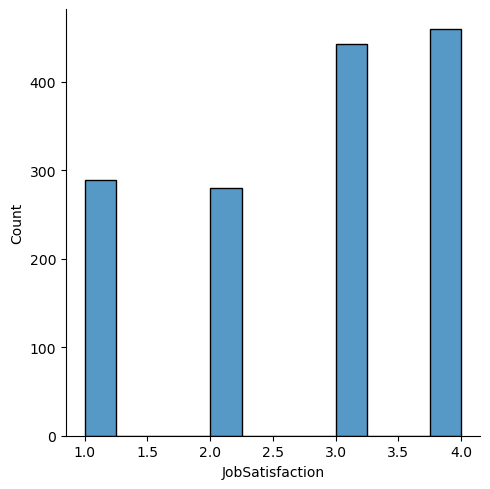

In [29]:
sns.displot(HR['JobSatisfaction'])

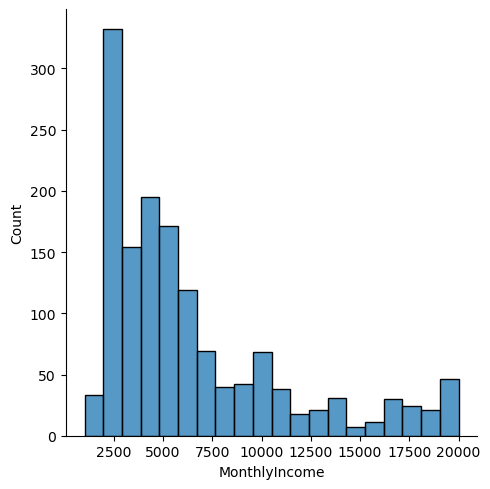

In [30]:
sns.displot(HR['MonthlyIncome'])

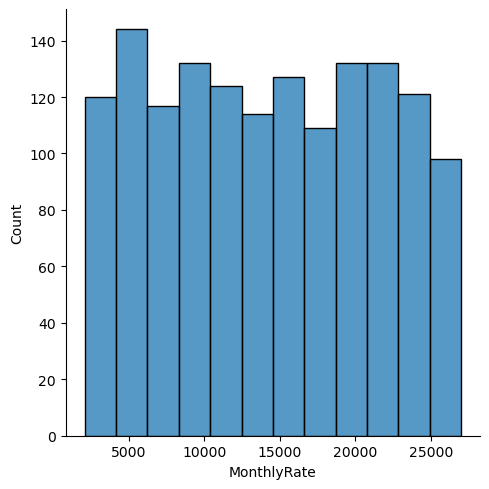

In [31]:
sns.displot(HR['MonthlyRate'])

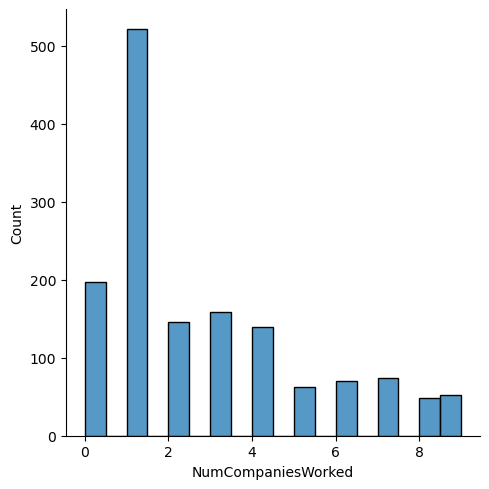

In [32]:
sns.displot(HR['NumCompaniesWorked'])

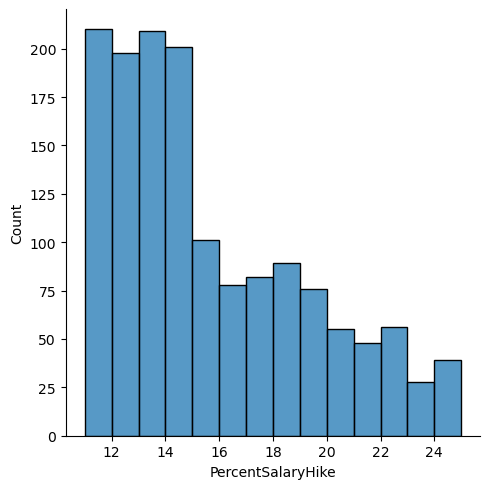

In [33]:
sns.displot(HR['PercentSalaryHike'])

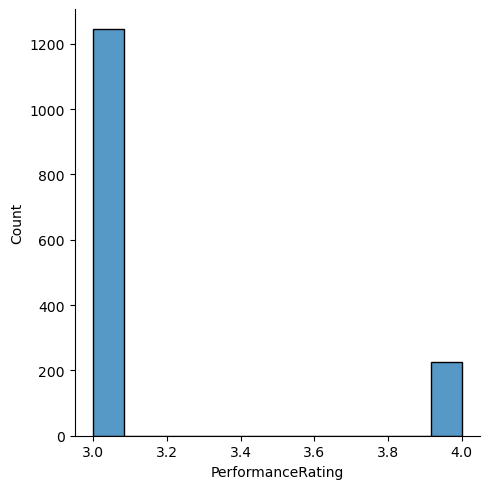

In [34]:
sns.displot(HR['PerformanceRating'])

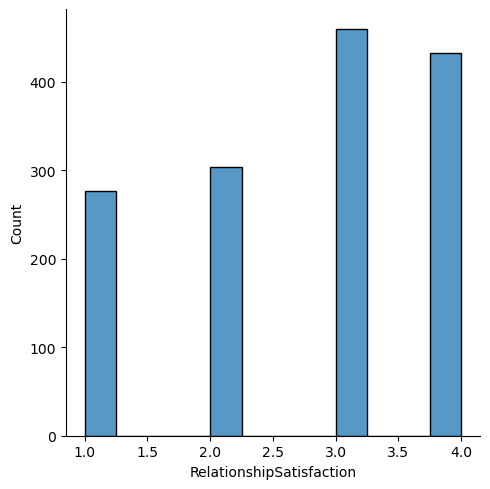

In [35]:
sns.displot(HR['RelationshipSatisfaction'])

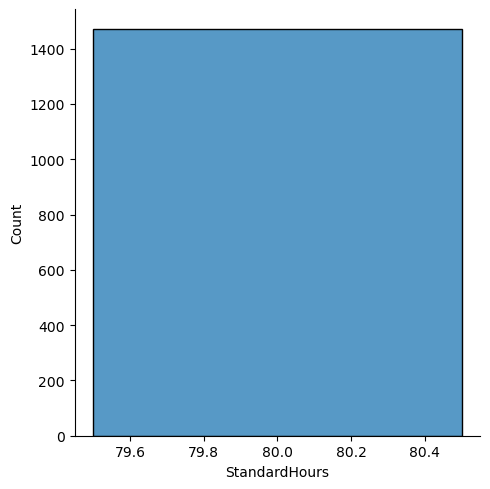

In [36]:
sns.displot(HR['StandardHours'])

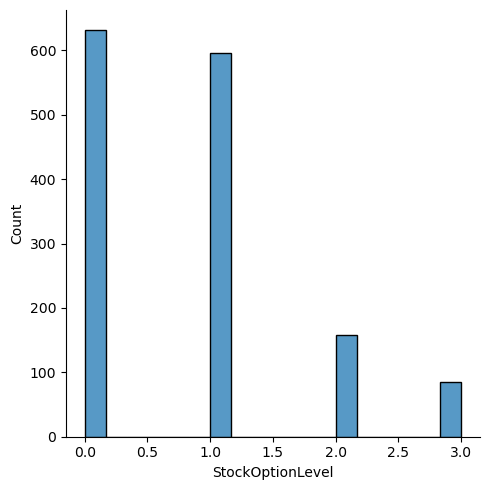

In [37]:
sns.displot(HR['StockOptionLevel'])

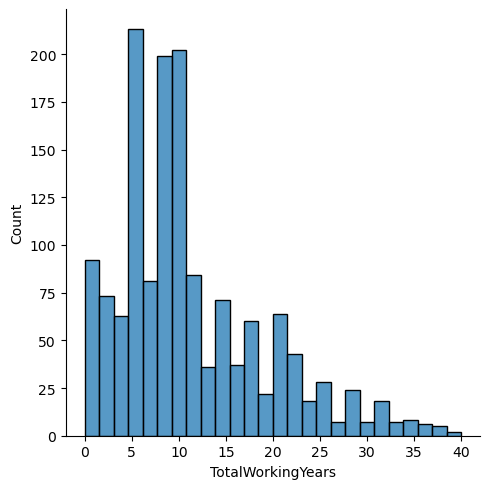

In [38]:
sns.displot(HR['TotalWorkingYears'])

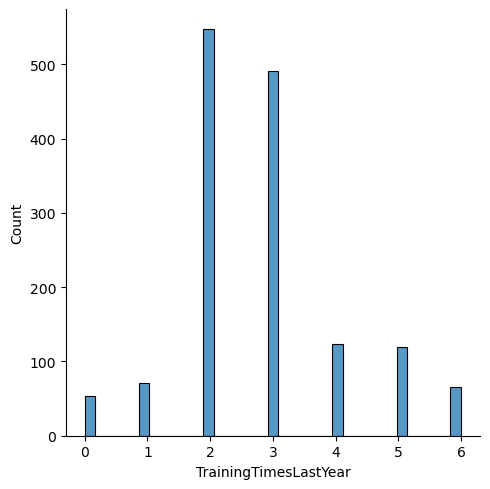

In [39]:
sns.displot(HR['TrainingTimesLastYear'])

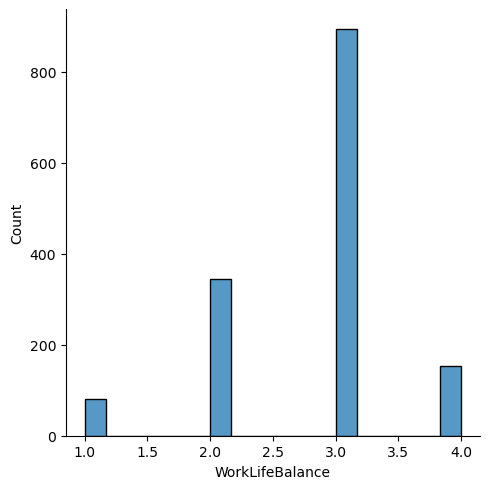

In [40]:
sns.displot(HR['WorkLifeBalance'])

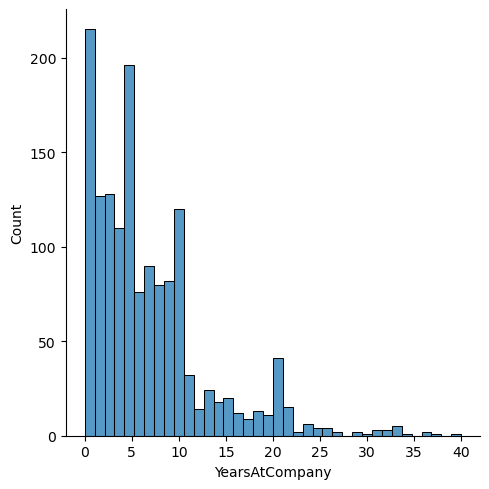

In [41]:
sns.displot(HR['YearsAtCompany'])

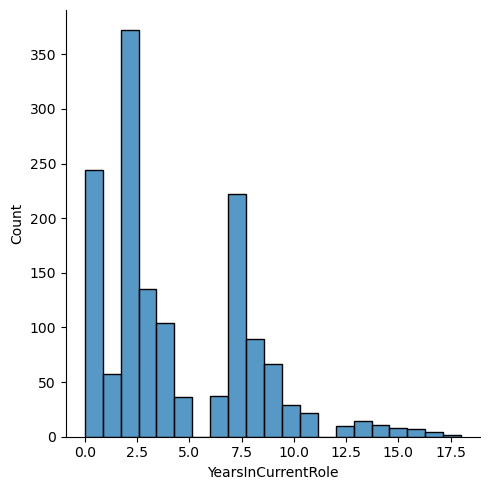

In [42]:
sns.displot(HR['YearsInCurrentRole'])

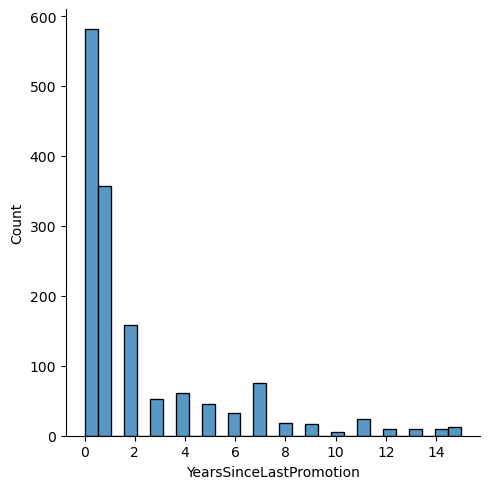

In [43]:
sns.displot(HR['YearsSinceLastPromotion'])

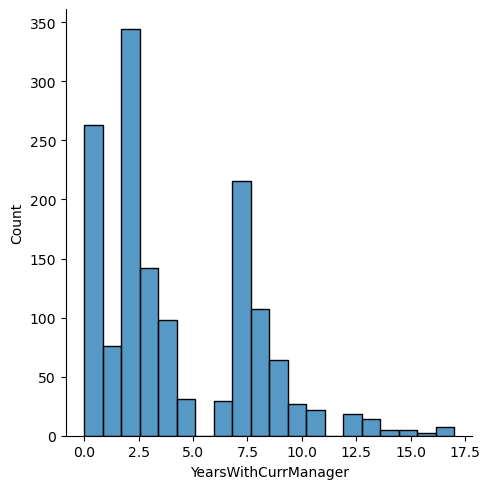

In [44]:
sns.displot(HR['YearsWithCurrManager'])

# Uses the plot.hist()

<Axes: ylabel='Frequency'>

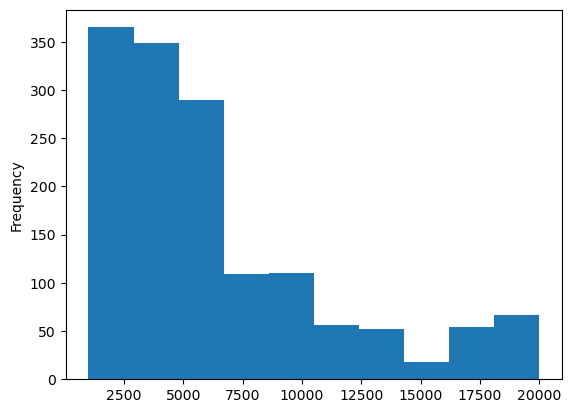

In [45]:
HR['MonthlyIncome'].plot.hist()

# uses the sns.pairplot()

In [ ]:
sns.pairplot(HR)

<Axes: >

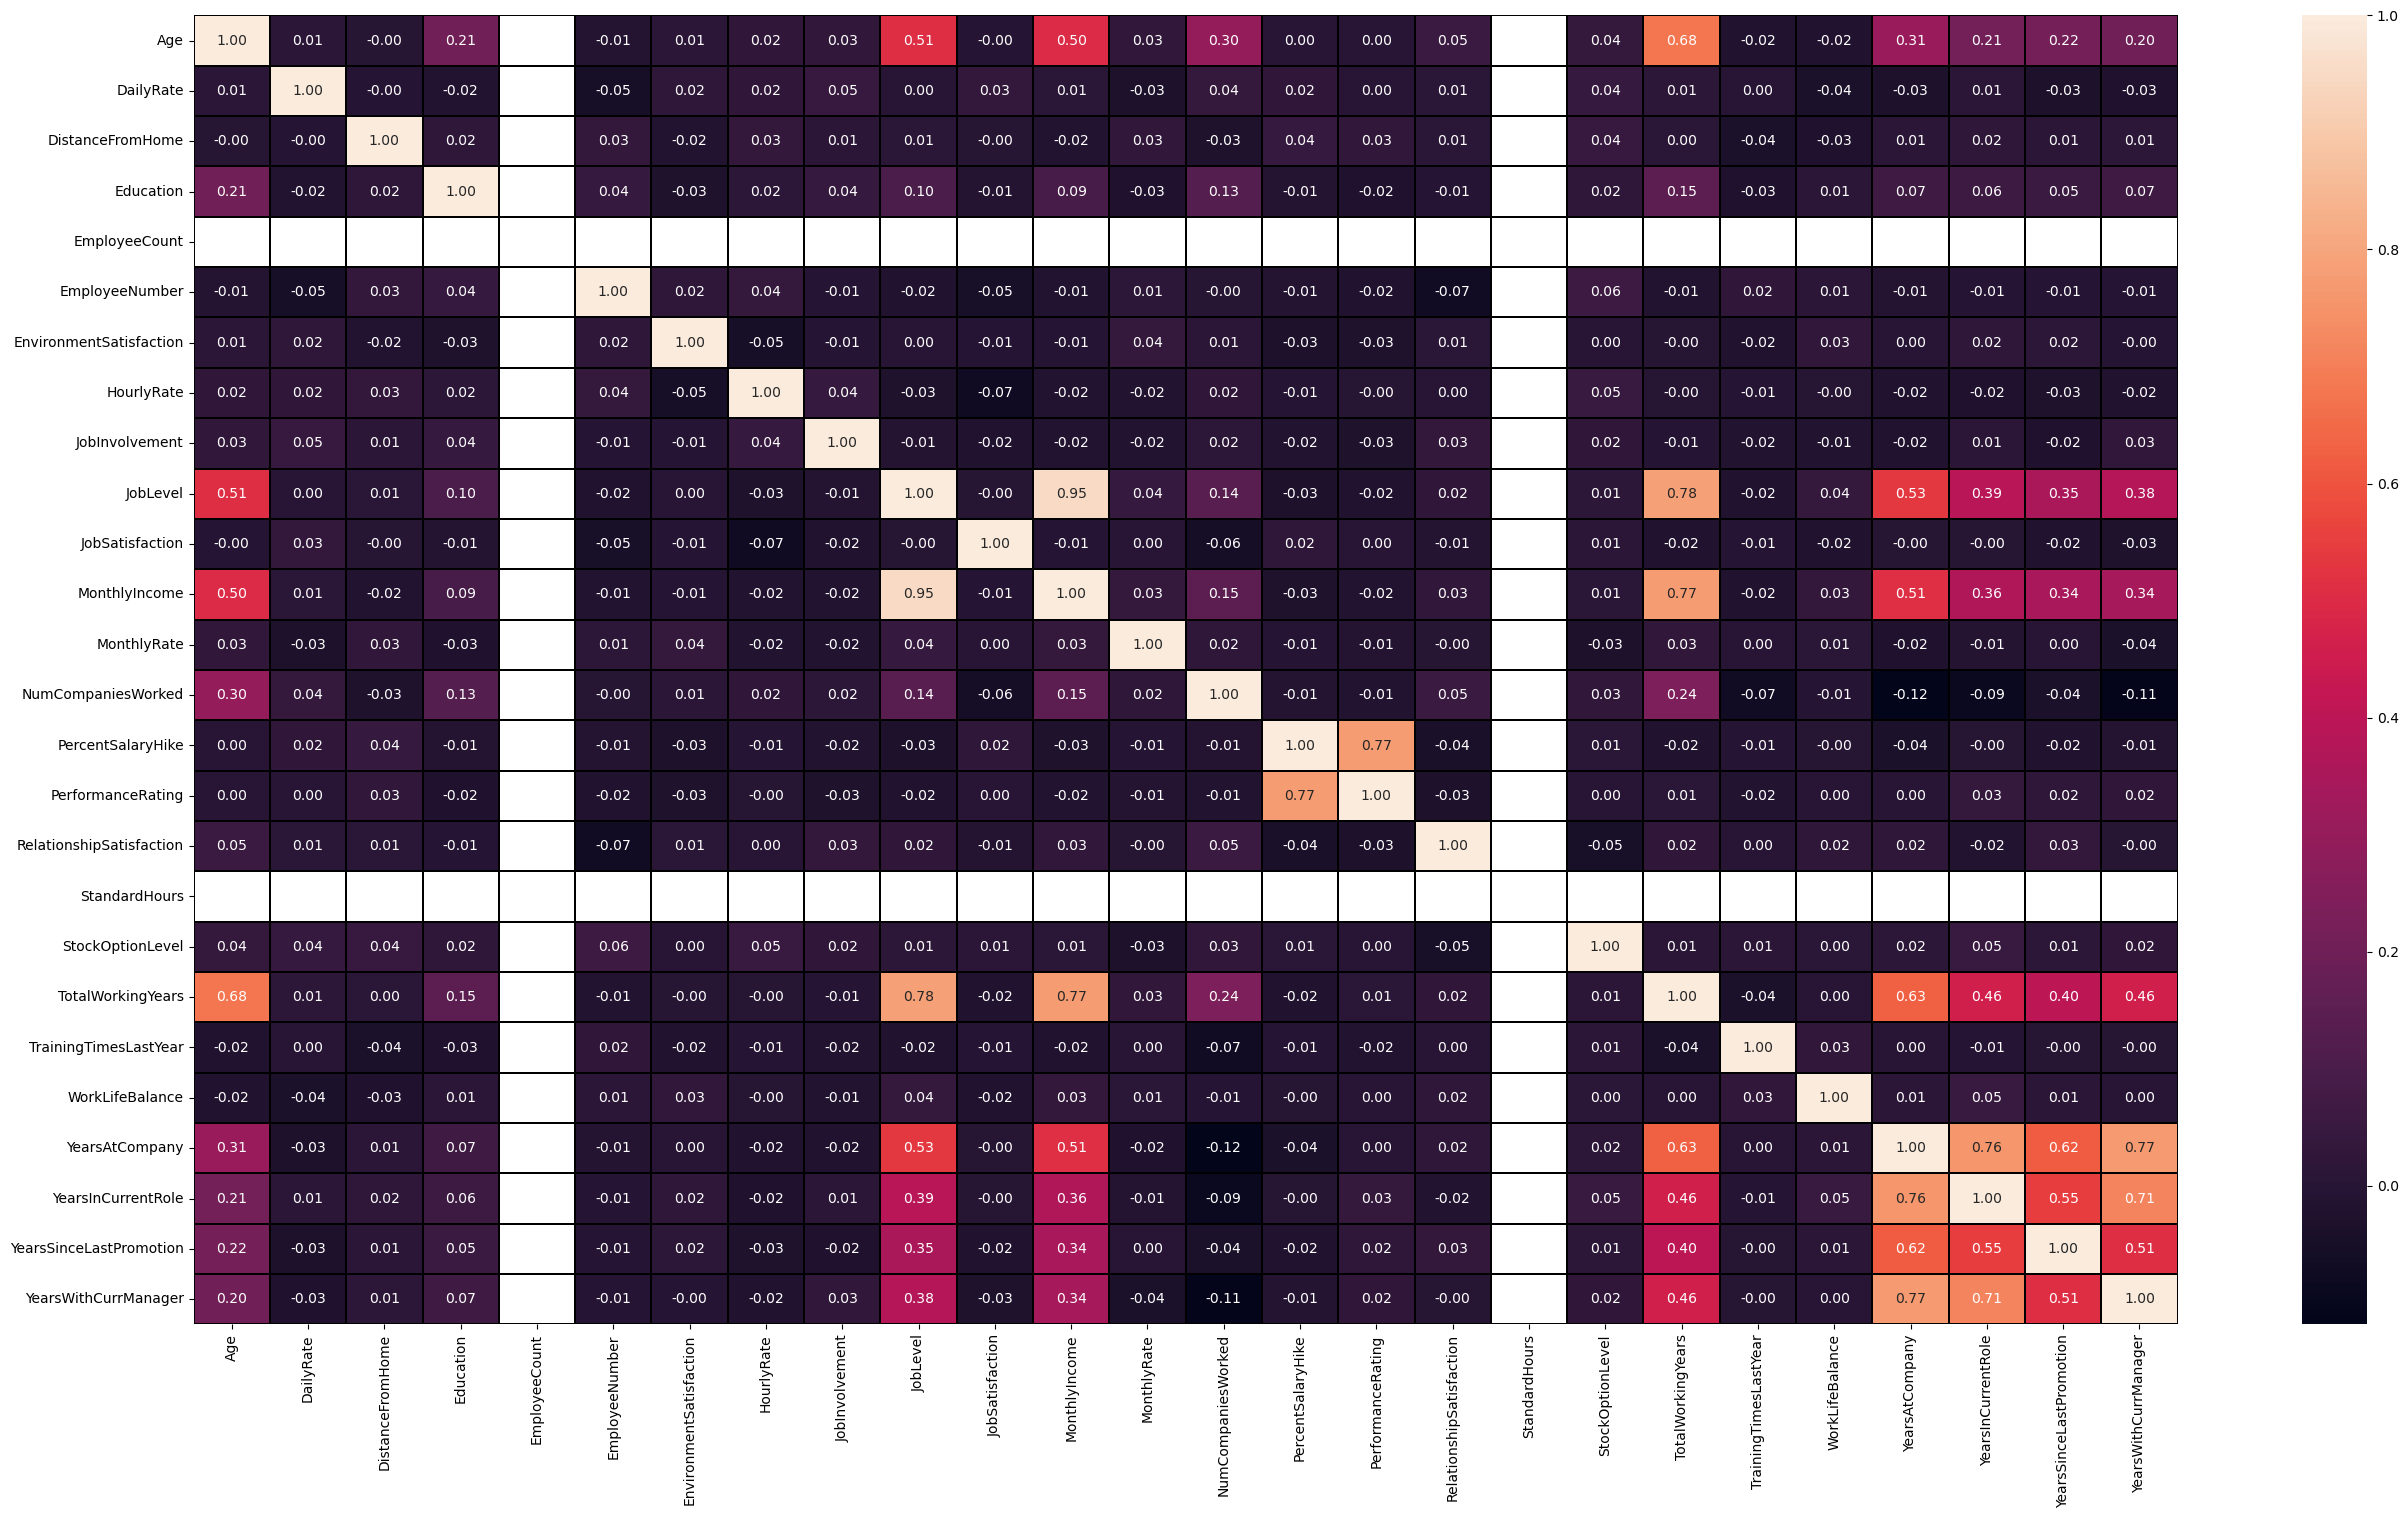

In [47]:
plt.figure(figsize=(32,17)) # ploting the heat map
sns.heatmap(HR.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

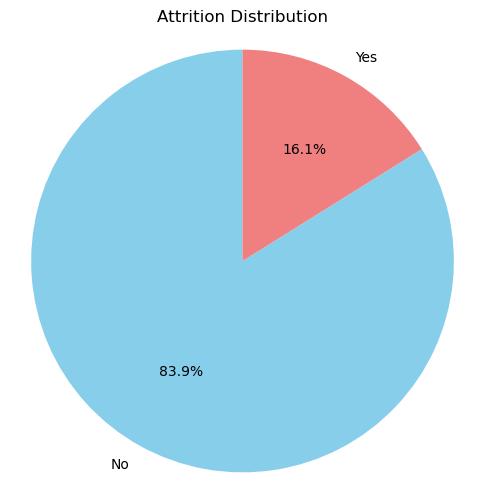

In [84]:
# Visualize the distribution of 'Attrition'
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Attrition Distribution')
plt.axis('equal')
plt.show()

In [87]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\del\\Desktop\\Python\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Convert 'Attrition' column to numeric values
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Group by 'EmployeeCount' and calculate the mean of 'Attrition'
attrition_by_job_role = data.groupby('EmployeeCount')['Attrition'].mean().sort_values(ascending=False)

print(attrition_by_job_role)


EmployeeCount
1    0.161224
Name: Attrition, dtype: float64


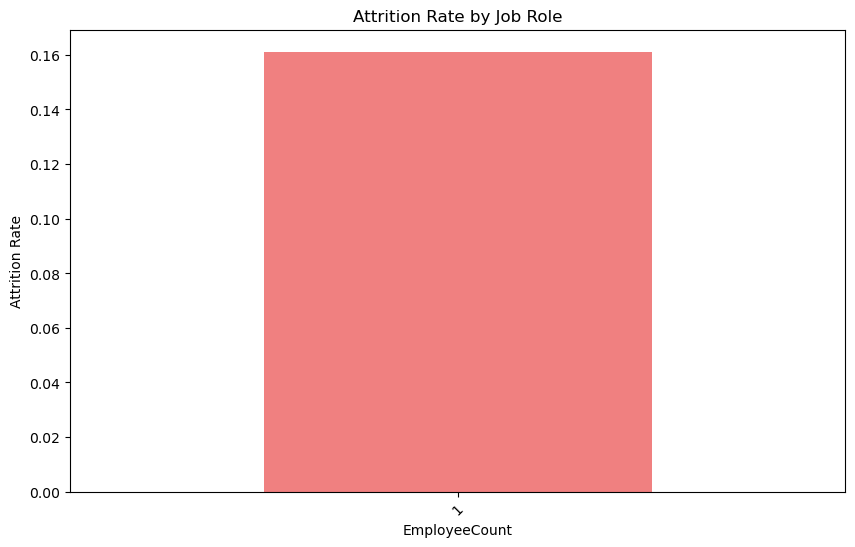

In [89]:
plt.figure(figsize=(10, 6))
attrition_by_job_role.plot(kind='bar', color='lightcoral')
plt.title('Attrition Rate by Job Role')
plt.xlabel('EmployeeCount')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()

In [90]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']